In [9]:
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import spsolve


In [10]:
%%timeit -n 3 -r 10
#import math
# Define Resistors and Capacitor Values
R1 = 8.4e5 # Resistance (Ohms)
R2 = 8.4e5 # Resistance (Ohms)
R3 = 4.7e5 # Resistance (Ohms)
R4 = 8.4e5 # Resistance (Ohms)
R5 = 1e4 # Resistance (Ohms)
R6 = 1e4 # Resistance (Ohms)
C1 = 4.7e-10 # Capacitance (Farads)
C2 = 4.7e-10 # Capacitance (Farads)
C3 = 5*C1
C4 = C1*15

# Define and angular frequency
w_v = np.logspace(0, 4, 100)*2*np.pi   #Uses numpy pi - Probably better for consistency but does not matter

#Define an output vector, don't keep continually change the array size
Vout_final = np.zeros(np.shape(w_v), dtype=complex) # Note need to define the array as complex for later

# Define an empty matrix (array) of the correct size to hold the equations
M = np.zeros((9,9), dtype=complex) # Note need to define the array as complex for later
# Define an input vector
Vin = np.array([0, 0, 0, 0, 0, -1, 0, 0, 0])

# https://docs.python.org/3/tutorial/controlflow.html
for ii in range(0, np.size(w_v) ): # Don't forget the colon
 w = w_v[ii]

 # Imaginary number in python https://numpy.org/doc/1.18/reference/generated/numpy.imag.html use 1j
 ZC1 = 1/(1j*w*C1)
 ZC2 = 1/(1j*w*C2)
 ZC3 = 1/(1j*w*C3)
 ZC4 = 1/(1/R4 +1j*w*C4)
 M[0,:] = [0,0,0,0,0,0,0,1,-R5/(R5+R6)]
 M[1,:] = [R1, R2, ZC1, ZC2, 0,0, 0, 0, 0]
 M[2,:] = [1, -1, 0, 0, 1, 0, 0, 0, 0]
 M[3,:] = [0, ZC4, 0, -ZC4, 0, 0, 0, -1, 0]
 M[4,:] = [0, 0, -R3, R3, 0, 0, -1, 0, 0]
 M[5,:] = [-R1, 0, 0, 0, 0, -1, 0, 0, 0]
 M[6,:] = [0, -R2, 0, 0, 0, 1, 0, -1, 0]
 M[7,:] = [0, 0, 0 ,-ZC2, 0, 0, -1, 1, 0]
 M[8,:] = [0, 0, 0, 0, -ZC3,-1, 0, 0, 1]
    
 Vout = np.linalg.solve(M, Vin)
 Vout_final[ii] = Vout[8] # Remember indices start with 0


3.85 ms ± 867 μs per loop (mean ± std. dev. of 10 runs, 3 loops each)


In [ ]:
%%timeit -n 3 -r 10
#import math
# Define Resistors and Capacitor Values
R1 = 8.4e5 # Resistance (Ohms)
R2 = 8.4e5 # Resistance (Ohms)
R3 = 4.7e5 # Resistance (Ohms)
R4 = 8.4e5 # Resistance (Ohms)
R5 = 1e4 # Resistance (Ohms)
R6 = 1e4 # Resistance (Ohms)
C1 = 4.7e-10 # Capacitance (Farads)
C2 = 4.7e-10 # Capacitance (Farads)
C3 = 5*C1
C4 = C1*15

# Define and angular frequency
w_v = np.logspace(0, 4, 100)*2*np.pi   #Uses numpy pi - Probably better for consistency but does not matter

#Define an output vector, don't keep continually change the array size
Vout_final = np.zeros(np.shape(w_v), dtype=complex) # Note need to define the array as complex for later

# Define an empty matrix (array) of the correct size to hold the equations
M = np.zeros((9,9), dtype=complex) # Note need to define the array as complex for later
# Define an input vector
Vin = np.array([0, 0, 0, 0, 0, -1, 0, 0, 0])

# https://docs.python.org/3/tutorial/controlflow.html
for ii in range(0, np.size(w_v) ): # Don't forget the colon
 w = w_v[ii]

 # Imaginary number in python https://numpy.org/doc/1.18/reference/generated/numpy.imag.html use 1j
 ZC1 = 1/(1j*w*C1)
 ZC2 = 1/(1j*w*C2)
 ZC3 = 1/(1j*w*C3)
 ZC4 = 1/(1/R4 +1j*w*C4)
 M[0,:] = [0,0,0,0,0,0,0,1,-R5/(R5+R6)]
 M[1,:] = [R1, R2, ZC1, ZC2, 0,0, 0, 0, 0]
 M[2,:] = [1, -1, 0, 0, 1, 0, 0, 0, 0]
 M[3,:] = [0, ZC4, 0, -ZC4, 0, 0, 0, -1, 0]
 M[4,:] = [0, 0, -R3, R3, 0, 0, -1, 0, 0]
 M[5,:] = [-R1, 0, 0, 0, 0, -1, 0, 0, 0]
 M[6,:] = [0, -R2, 0, 0, 0, 1, 0, -1, 0]
 M[7,:] = [0, 0, 0 ,-ZC2, 0, 0, -1, 1, 0]
 M[8,:] = [0, 0, 0, 0, -ZC3,-1, 0, 0, 1]

 # convert M to sparse matric
 M_sparse = csr_matrix(M)
 
 # Solve system using sparse solver
 Vout = spsolve(M_sparse, Vin)
 Vout_final[ii] = Vout[8] # Remember indices start with 0

14.4 ms ± 3.56 ms per loop (mean ± std. dev. of 10 runs, 3 loops each)


Text(0, 0.5, 'Phase(rads)')

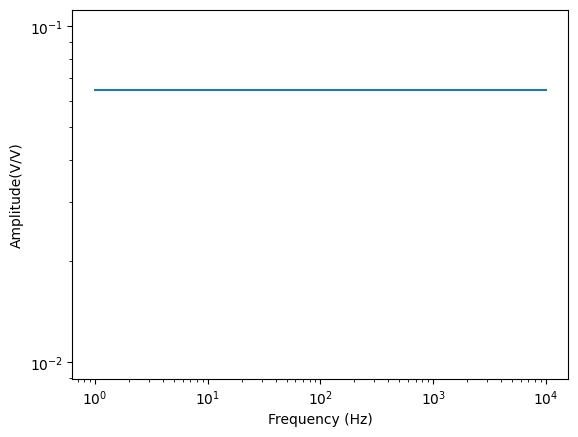

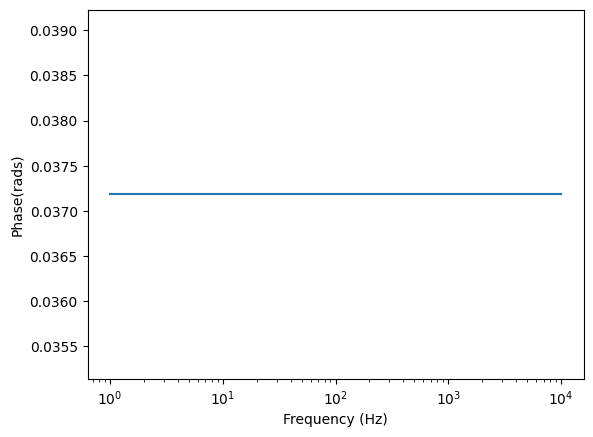

In [3]:
import matplotlib.pyplot as plt
plt.loglog(w_v/(2*np.pi),np.absolute(Vout_final))
plt.figure(1)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude(V/V)')

plt.figure(2)
plt.semilogx(w_v/(2*np.pi),np.angle(Vout_final))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase(rads)')